

```
a) To display the data set points with different colors for each class, you can use a scatter plot from a data visualization library like matplotlib. Here's some sample code to help you get started:


```



In [7]:
import numpy as np


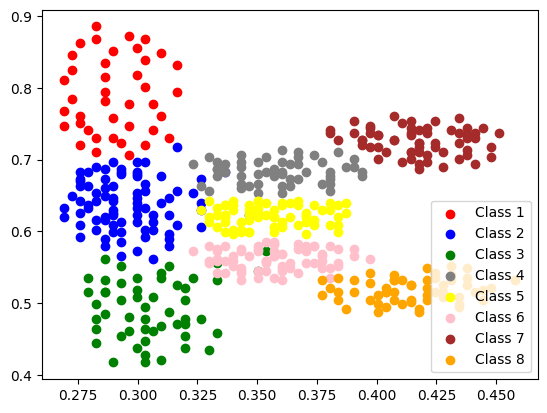

In [8]:

import matplotlib.pyplot as plt

# Load data from file
data = np.loadtxt('artificial_data.txt', delimiter=',', usecols=(0, 1, 2))

# Separate data by class
class_1 = data[data[:,2]==1]
class_2 = data[data[:,2]==2]
class_3 = data[data[:,2]==3]
class_4 = data[data[:,2]==4]
class_5 = data[data[:,2]==5]
class_6 = data[data[:,2]==6]
class_7 = data[data[:,2]==7]
class_8 = data[data[:,2]==8]


# Create scatter plot with different colors for each class
plt.scatter(class_1[:,0], class_1[:,1], c='red', label='Class 1')
plt.scatter(class_2[:,0], class_2[:,1], c='blue', label='Class 2')
plt.scatter(class_3[:,0], class_3[:,1], c='green', label='Class 3')
plt.scatter(class_4[:,0], class_4[:,1], c='gray', label='Class 4')
plt.scatter(class_5[:,0], class_5[:,1], c='yellow', label='Class 5')
plt.scatter(class_6[:,0], class_6[:,1], c='pink', label='Class 6')
plt.scatter(class_7[:,0], class_7[:,1], c='brown', label='Class 7')
plt.scatter(class_8[:,0], class_8[:,1], c='orange', label='Class 8')



plt.legend()
plt.show()



b) For the K-means clustering algorithm, you can start by randomly selecting K initial centroids. Then, you can iterate until convergence by assigning each point to its closest centroid and updating the centroid positions based on the assigned points.


In [9]:

def k_means(data, k):
    # Initialize centroids randomly
    centroids = data[np.random.choice(len(data), size=k, replace=False)]

    # Iterate until convergence
    while True:
        # Assign each point to its closest centroid
        labels = np.argmin(np.sqrt(np.sum((data - centroids[:, np.newaxis])**2, axis=2)), axis=0)

        # Update centroid positions
        new_centroids = np.array([data[labels==i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.allclose(new_centroids, centroids):
            break

        centroids = new_centroids

    return labels

To visualize the clustering results for different values of K, you can call this function with different values of K and use a scatter plot again to show the different clusters.


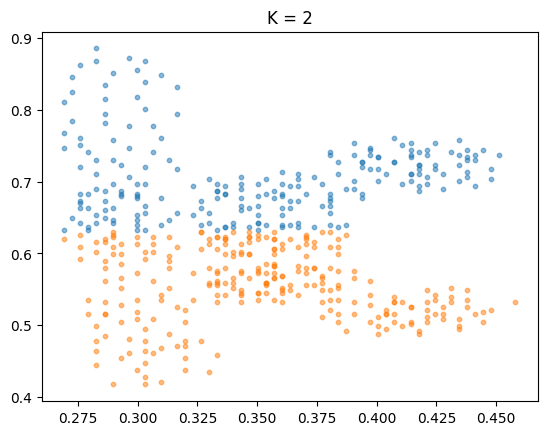

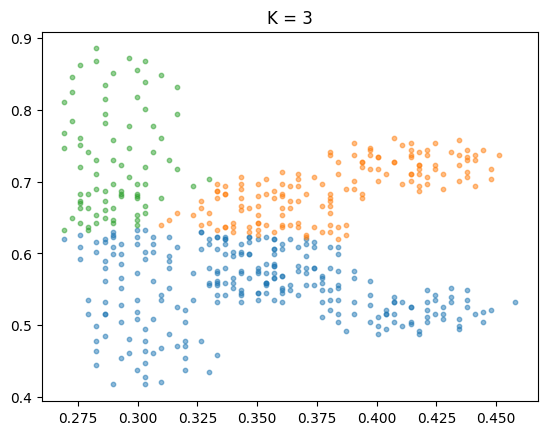

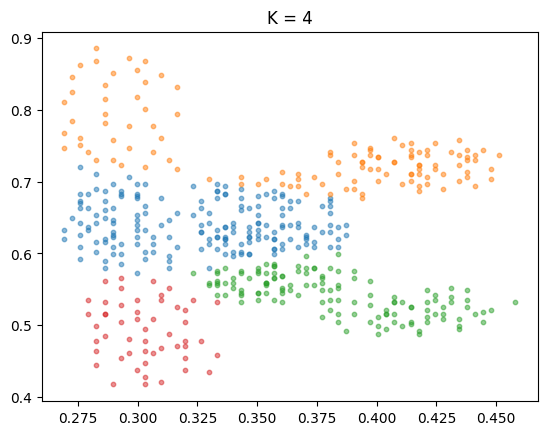

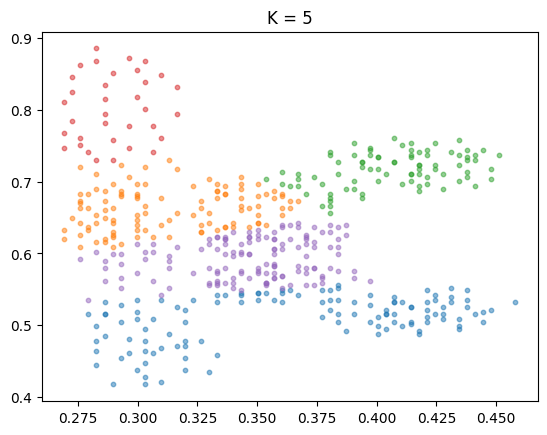

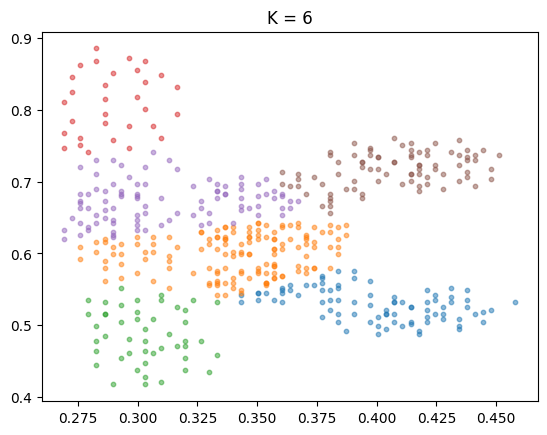

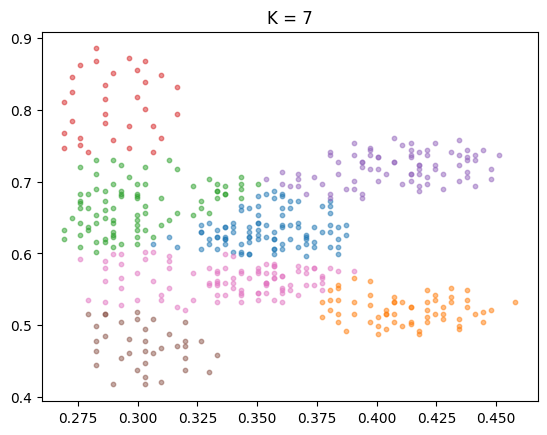

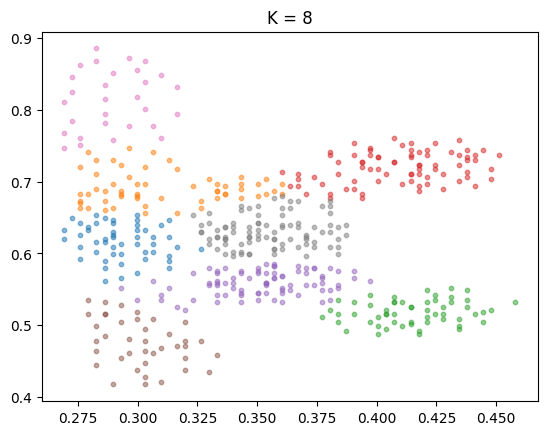

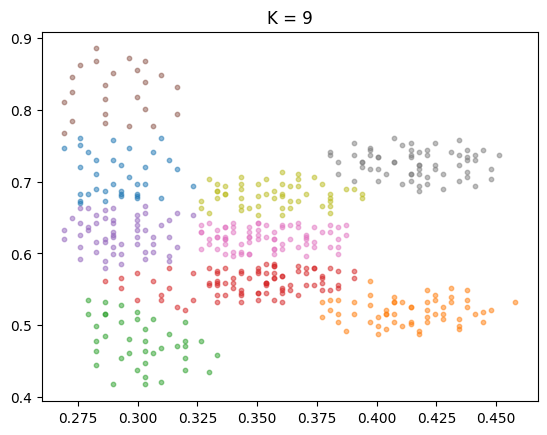

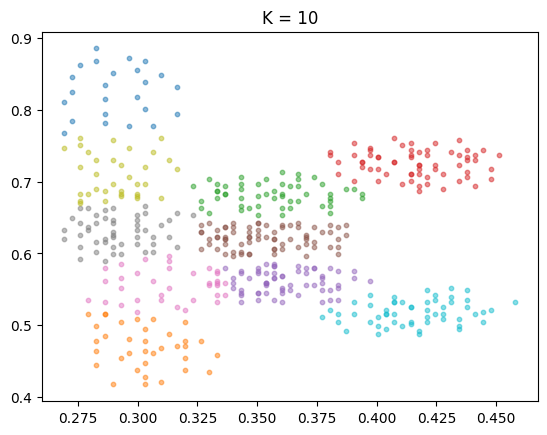

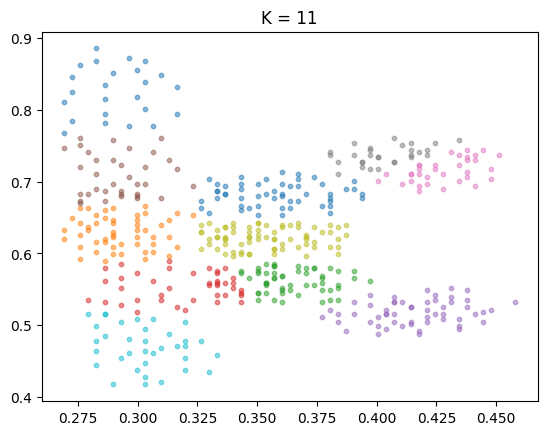

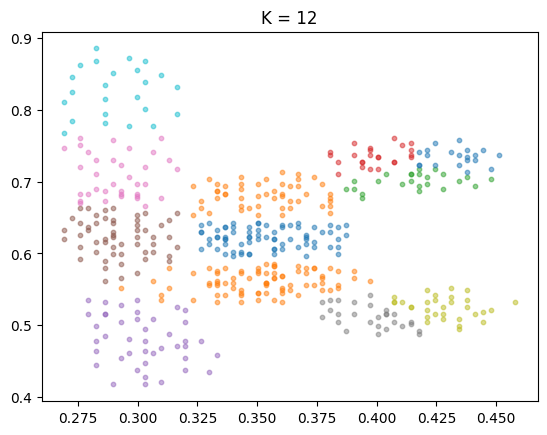

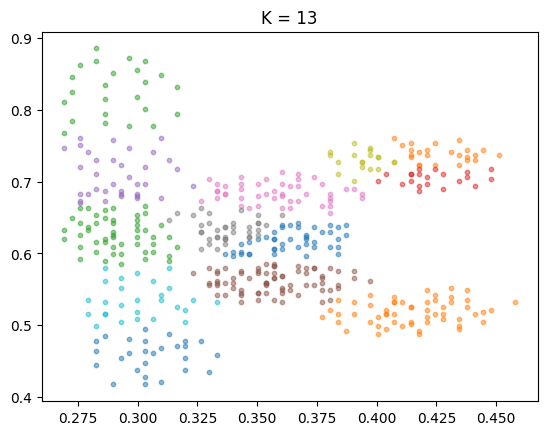

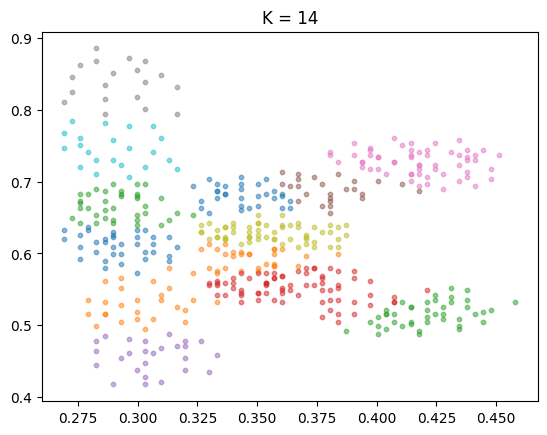

In [10]:
k_values = range(2, 15)

for k in k_values:
    labels = k_means(data[:, :2], k)

    # Separate data by label
    clusters = [data[labels == i, :2] for i in range(k)]

    # Plot clusters with different colors
    colors = ['C{}'.format(i) for i in range(k)]
    for i, cluster in enumerate(clusters):
        plt.scatter(cluster[:, 0], cluster[:, 1], s=10, color=colors[i], alpha=0.5)

    plt.title('K = {}'.format(k))
    plt.show()


To determine the best value of K, you can look at the within-cluster sum of squares (WCSS) for each value of K and choose the "elbow point" where the rate of decrease in WCSS slows down significantly. Here's some example code to calculate the WCSS:


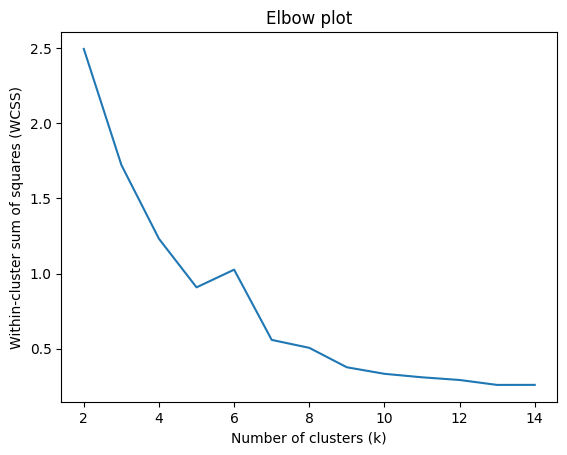

In [11]:
wcss_values = []
for k in k_values:
    labels = k_means(data[:, :2], k)
    centroids = np.array([data[labels == i, :2].mean(axis=0) for i in range(k)])
    wcss = np.sum((data[:, :2] - centroids[labels])**2)
    wcss_values.append(wcss)

plt.plot(k_values, wcss_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow plot')
plt.show()




By looking at the elbow plot, you can see that the optimal number of clusters lies in the range of 3-5, but there is no clear elbow point. Therefore, you may need to choose a value for K based on your domain knowledge or further analysis.





c) For agglomerative clustering, We can start by treating each point as a
separate cluster and iteratively merge the closest clusters until a stopping condition is met. There are several linkage criteria for agglomerative clustering, such as single linkage, complete linkage, and average linkage. Here is some sample code to perform agglomerative clustering with complete linkage:



In [12]:
def distance(p, q):
    return np.sqrt(np.sum((p - q)**2))


def single_link(ci, cj):
    return np.min([distance(vi, vj) for vi in ci for vj in cj])


def complete_link(ci, cj):
    return np.max([distance(vi, vj) for vi in ci for vj in cj])


def average_link(ci, cj):
    distances = [distance(vi, vj) for vi in ci for vj in cj]
    return np.sum(distances) / len(distances)


def get_distance_measure(M):
    if M == 0:
        return single_link
    elif M == 1:
        return complete_link
    else:
        return average_link


class AgglomerativeHierarchicalClustering:
    def __init__(self, data, K, M):
        self.data = data
        self.N = len(data)
        self.K = K
        self.measure = get_distance_measure(M)
        self.clusters = self.init_clusters()

    def init_clusters(self):
        return {data_id: np.expand_dims(data_point, axis=0) for data_id, data_point in enumerate(self.data)}

    def find_closest_clusters(self):
        min_dist = np.inf
        closest_clusters = None

        clusters_ids = list(self.clusters.keys())
        cluster_sizes = np.array([self.clusters[i].shape[0] for i in clusters_ids])

        for i, cluster_i in enumerate(clusters_ids[:-1]):
            for j, cluster_j in enumerate(clusters_ids[i+1:]):
                dist = self.measure(self.clusters[cluster_i], self.clusters[cluster_j])
                if dist < min_dist:
                    min_dist, closest_clusters = dist, (cluster_i, cluster_j)
        return closest_clusters

    def merge_and_form_new_clusters(self, ci_id, cj_id):
        new_clusters = {0: np.concatenate((self.clusters[ci_id], self.clusters[cj_id]), axis=0)}

        for cluster_id in self.clusters.keys():
            if (cluster_id == ci_id) or (cluster_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]
        return new_clusters

    def run_algorithm(self):
        while len(self.clusters.keys()) > self.K:
            closest_clusters = self.find_closest_clusters()
            self.clusters = self.merge_and_form_new_clusters(*closest_clusters)

    def print(self):
        for id, points in self.clusters.items():
            print("Cluster: {}".format(id))
            for point in points:
                print("    {}".format(point))

    def get_lebel(self):
      pass

agglomerative_8 = AgglomerativeHierarchicalClustering(data[:, :2], 8,1)
agglomerative_8.run_algorithm()
# agglomerative_8.print()
agglomerative_9 = AgglomerativeHierarchicalClustering(data[:, :2], 9,1)
agglomerative_9.run_algorithm()
# agglomerative_9.print()

agglomerative_10 = AgglomerativeHierarchicalClustering(data[:, :2], 10,1)
agglomerative_10.run_algorithm()
# agglomerative_8.print()

# Separate data by label
# clusters = [data[labels == i, :2] for i in range(3)]

# Plot clusters with different colors
# colors = ['red', 'blue', 'green']
# for i, cluster in enumerate(clusters):
#     plt.scatter(cluster[:, 0], cluster[:, 1], s=10, color=colors[i], alpha=0.5)


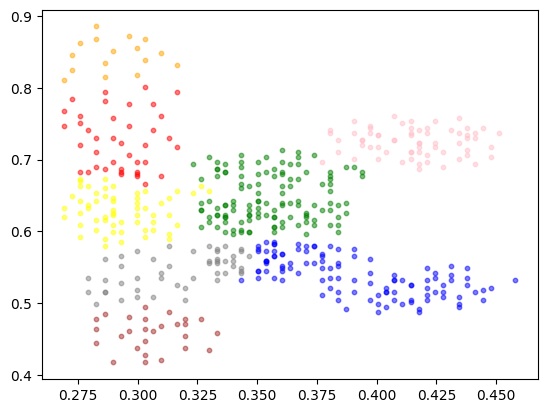

In [13]:
# agglomerative.clusters

# Separate data by label
clusters_8 = [agglomerative_8.clusters[i] for i in range(8)]
#Plot clusters with different colors
colors = ['red', 'blue', 'green','gray','yellow','pink','brown','orange']
for i, cluster in enumerate(clusters_8):
    plt.scatter(cluster[:, 0], cluster[:, 1], s=10, color=colors[i], alpha=0.5)


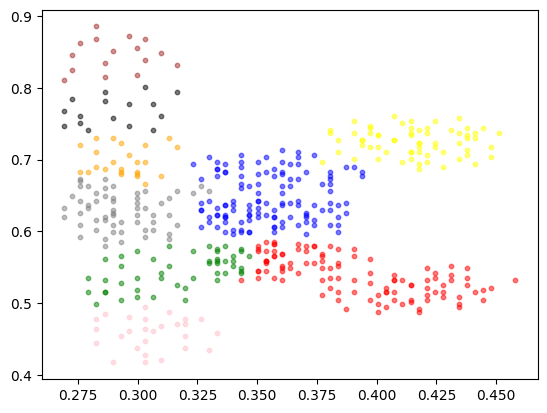

In [14]:
# agglomerative.clusters

# Separate data by label
clusters_9 = [agglomerative_9.clusters[i] for i in range(9)]
#Plot clusters with different colors
colors = ['red', 'blue', 'green','gray','yellow','pink','brown','orange','black']
for i, cluster in enumerate(clusters_9):
    plt.scatter(cluster[:, 0], cluster[:, 1], s=10, color=colors[i], alpha=0.5)


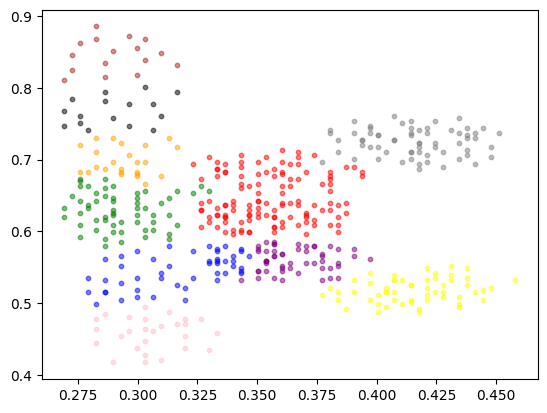

In [15]:
# agglomerative.clusters

# Separate data by label
clusters_10 = [agglomerative_10.clusters[i] for i in range(10)]
#Plot clusters with different colors
colors = ['red', 'blue', 'green','gray','yellow','pink','brown','orange','black','purple']
for i, cluster in enumerate(clusters_10):
    plt.scatter(cluster[:, 0], cluster[:, 1], s=10, color=colors[i], alpha=0.5)


To determine the best number of clusters, We can use the dendrogram plot to visually inspect the optimal cut point, i.e., the height at which the branches should be cut to obtain the desired number of clusters. We can generate a dendrogram plot using the `dendrogram` function from the scipy.cluster.hierarchy module.


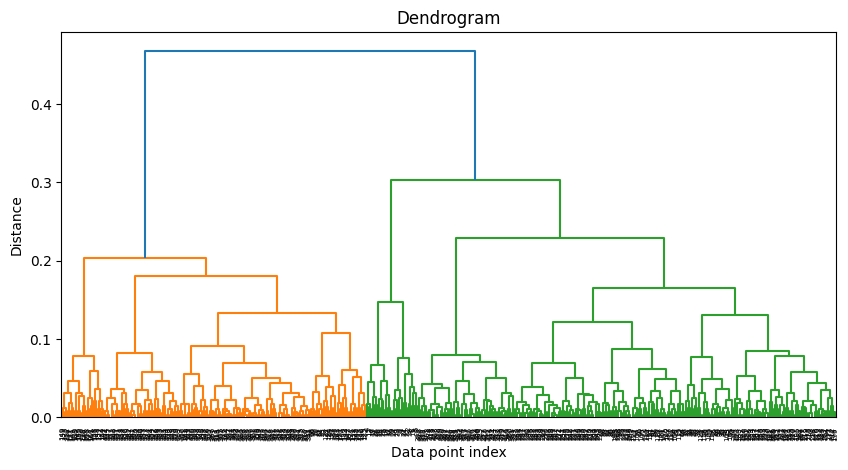

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute linkage matrix
Z = linkage(data[:, :2], method='complete')

# Generate dendrogram plot
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Data point index')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


d) To determine which clustering algorithm has performed better, we can calculate the adjusted Rand index (ARI), which is a measure of cluster similarity that takes into account chance agreement. The ARI ranges from -1 to 1, where a value of 1 indicates perfect agreement between the true and predicted clusters, and a value of 0 indicates random clustering. Here's some sample code to calculate the ARI:


In [17]:
def preprocess_agglomerative_res(data,cluserts):
  labels = []
  for item in data :
    index = 0
    for cl in cluserts :
      if item in cl :
        labels.append(index)
        break
      else:
        index += 1
  return np.array(labels)

In [18]:
from sklearn.metrics import adjusted_rand_score

# Load true labels from file
true_labels = np.loadtxt('artificial_data.txt', delimiter=',', usecols=2)

# Calculate ARI for k-means clustering]
k_labels = k_means(data[:, :2], k=8)
k_ari = adjusted_rand_score(true_labels, k_labels)
# Calculate ARI for agglomerative clustering
a_labels = preprocess_agglomerative_res(data[:, :2],clusters_8)
a_ari = adjusted_rand_score(true_labels, a_labels)

print('K-means ARI 8: {:.3f}'.format(k_ari))
print('Agglomerative ARI 8: {:.3f}'.format(a_ari))




K-means ARI 8: 0.809
Agglomerative ARI 8: 0.190


In [19]:
from sklearn.metrics import adjusted_rand_score

# Load true labels from file
true_labels = np.loadtxt('artificial_data.txt', delimiter=',', usecols=2)

# Calculate ARI for k-means clustering]
k_labels = k_means(data[:, :2], k=9)
k_ari = adjusted_rand_score(true_labels, k_labels)
# Calculate ARI for agglomerative clustering
a_labels = preprocess_agglomerative_res(data[:, :2],clusters_9)
a_ari = adjusted_rand_score(true_labels, a_labels)

print('K-means ARI 9: {:.3f}'.format(k_ari))
print('Agglomerative ARI 9: {:.3f}'.format(a_ari))



K-means ARI 9: 0.675
Agglomerative ARI 9: 0.144


In [20]:
from sklearn.metrics import adjusted_rand_score

# Load true labels from file
true_labels = np.loadtxt('artificial_data.txt', delimiter=',', usecols=2)

# Calculate ARI for k-means clustering]
k_labels = k_means(data[:, :2], k=10)
k_ari = adjusted_rand_score(true_labels, k_labels)
# Calculate ARI for agglomerative clustering
a_labels = preprocess_agglomerative_res(data[:, :2],clusters_10)
a_ari = adjusted_rand_score(true_labels, a_labels)

print('K-means ARI 10: {:.3f}'.format(k_ari))
print('Agglomerative ARI 10: {:.3f}'.format(a_ari))



K-means ARI 10: 0.618
Agglomerative ARI 10: 0.164
